1) EDA
Realizar un análisis exploratorio de los datos. 

In [1]:
#Imoprto todas las librerias que voy a utilizar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [2]:
#Descargo el dataset
data = pd.read_csv("data.csv", low_memory = False)

#Cantidad de filas y columnas
print('El dataset contiene', data.shape[0], ' filas y', data.shape[1],' columnas')

#Columas
print('\nLas columnas del data set son:',data.columns)

#Tipos de variables
print('\nTipo de variable de cada columna:\n',data.dtypes)

#Analizo si hay valores nulos
print('\nCantidad de valores faltantes por columna\n:',data.isna().sum())

#Imprimo las primeras 5 filas del dataset
data.head()

El dataset contiene 392892  filas y 15  columnas

Las columnas del data set son: Index(['fullVisitorID', 'visitNumber', 'date', 'bounces', 'hits', 'pageviews',
       'timeOnSite', 'transactionRevenue', 'transactions', 'source',
       'channelGrouping', 'browser', 'deviceCategory', 'country', 'city'],
      dtype='object')

Tipo de variable de cada columna:
 fullVisitorID          object
visitNumber             int64
date                    int64
bounces               float64
hits                    int64
pageviews             float64
timeOnSite            float64
transactionRevenue    float64
transactions          float64
source                 object
channelGrouping        object
browser                object
deviceCategory         object
country                object
city                   object
dtype: object

Cantidad de valores faltantes por columna
: fullVisitorID              0
visitNumber                0
date                       0
bounces               196928
hits         

,fullVisitorID,visitNumber,date,bounces,hits,pageviews,timeOnSite,transactionRevenue,transactions,source,channelGrouping,browser,deviceCategory,country,city
0,8533875475515924645,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Australia,Sydney
1,4874599869430831185,2,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,mobile,Turkey,Istanbul
2,0361954421372951638,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Russia,Moscow
3,8751850432978942600,2,20170205,1.0,1,1.0,NaN,NaN,NaN,bing,Organic Search,Edge,desktop,United States,not available in demo dataset
4,2451058030378352110,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Indonesia,not available in demo dataset


El porcentaje de usuarios que realizaron una compra es: % 1.343117192510919 que corresponde a 5277 cantidad de personas de 392892
El porcentaje de visitas por primera vez es: % 76.0483797074005
El porcentaje de visitas por primera vez en las que se relizó una compra es: % 0.533225415635849


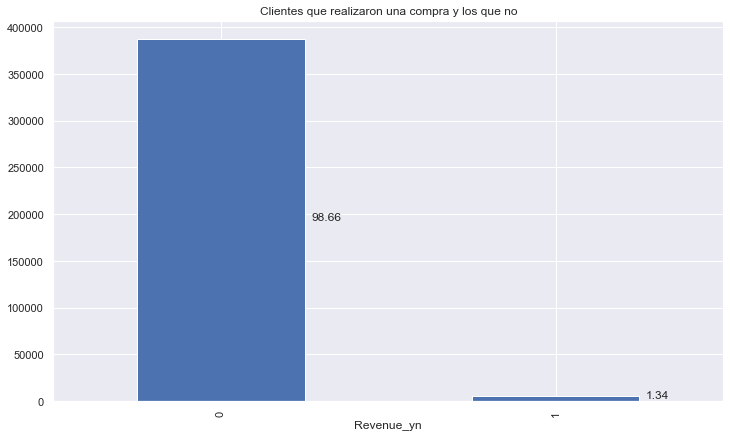

In [8]:
print("El porcentaje de usuarios que realizaron una compra es: %",(data.loc[data["transactionRevenue"] > 0].shape[0]/data.shape[0]*100), 'que corresponde a', len(data[data["transactionRevenue"] > 0]), 'cantidad de personas de', data.shape[0])
data_primera_visita = data.loc[data["visitNumber"] == 1]
print("El porcentaje de visitas por primera vez es: %", data_primera_visita.shape[0]/data.shape[0]*100)
print("El porcentaje de visitas por primera vez en las que se relizó una compra es: %", (data_primera_visita.loc[data_primera_visita["transactionRevenue"] > 0].shape[0]/data.shape[0]*100))

#Creo una nueva columa Revenue_yn, para saber si el usuario compró o no ya que es lo que me interesa saber
data['Revenue_yn'] = data["transactionRevenue"].apply(lambda x: 1 if x>0 else 0)

#Grafico para mostrar proporcion de usuarios que compraron y los que no. 
ax = data.groupby(['Revenue_yn']).size().plot(kind = 'bar', figsize = (12,7))

total = data.shape[0]

for p in ax.patches:
        percentage = "{:.2f}".format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.title('Clientes que realizaron una compra y los que no')
plt.show()

In [9]:
#Variable Pageviews
print('La cantidad promedio de paginas que visitaron los usuarios antes de realizar una compra es: ',data[data['Revenue_yn']  == 1 ]['pageviews'].mean())
print('La cantidad promedio de paginas que visitaron los usuarios que no realizaron una compra es: ',data[data['Revenue_yn']  == 0 ]['pageviews'].mean())

#Veo cuales son las 36 instancias con valor NaN
data[data['pageviews'].isna()]

#Las completo con el valor medio de la variable pageviews
data['pageviews'].fillna(data['pageviews'].mean(), inplace = True)


La cantidad promedio de paginas que visitaron los usuarios antes de realizar una compra es:  25.693386393784348
La cantidad promedio de paginas que visitaron los usuarios que no realizaron una compra es:  3.4725359217088645


In [10]:
#Variable timeOnSite

mean_time_buy = data[data['Revenue_yn'] == 1]['timeOnSite'].mean()
mean_time_notbuy = data[data['Revenue_yn'] == 0]['timeOnSite'].mean()

print('En promedio los clientes que realizan alguna compra, estan', mean_time_buy/60,' minutos en la pagina')
print('En promedio los clientes que no realizan ninguna compra, estan', mean_time_notbuy/60,' minutos en la pagina')

#pd.options.mode.chained_assignment = None
data[data['timeOnSite'].isna()]['Revenue_yn'].count()*100/data.shape[0]

#Completo los valores NaN de la variable timeOnSite con el valaor medio
data['timeOnSite'].fillna(data['timeOnSite'].mean(), inplace = True)
data.isna().sum()

En promedio los clientes que realizan alguna compra, estan 16.801187768511497  minutos en la pagina
En promedio los clientes que no realizan ninguna compra, estan 4.277520322863636  minutos en la pagina


fullVisitorID              0
visitNumber                0
date                       0
bounces               196928
hits                       0
pageviews                  0
timeOnSite                 0
transactionRevenue    387615
transactions          387615
source                     0
channelGrouping            0
browser                    0
deviceCategory             0
country                    0
city                       0
Revenue_yn                 0
dtype: int64

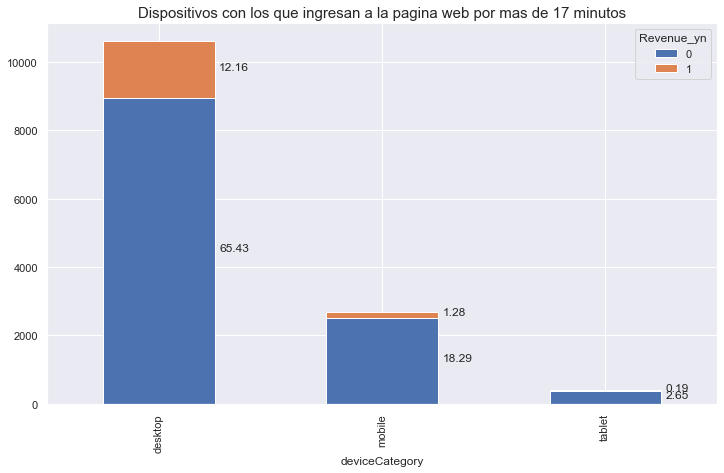

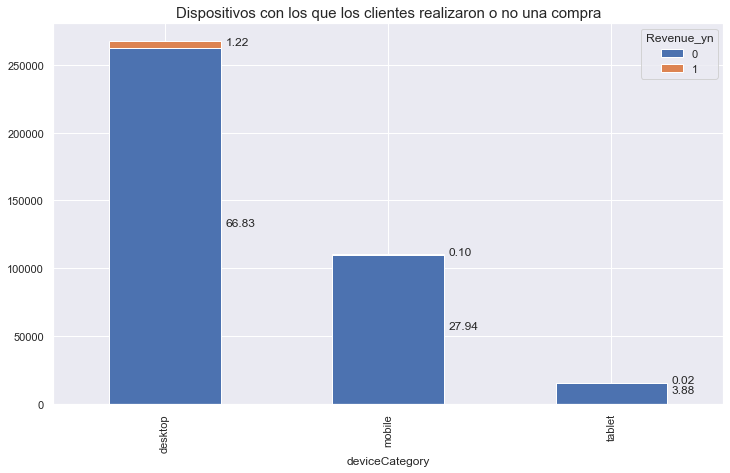

In [11]:
#Dispositivos que usaron los clientes que estuvieron en el sitio web por mas de 16,8 minutos, identificando aquellos que realizaron una compra y los que no.
ax = data[data['timeOnSite'] > mean_time_buy].groupby(['deviceCategory', 'Revenue_yn']).size().unstack(level = 1).plot(kind = 'bar', figsize = (12,7), stacked=True)

total = data[data['timeOnSite'] > mean_time_buy].shape[0]

for p in ax.patches:
        percentage = "{:.2f}".format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.title('Dispositivos con los que ingresan a la pagina web por mas de 17 minutos', fontsize = 15)
plt.show()

#Variable deviceCategory

ax = data.groupby(['deviceCategory', 'Revenue_yn']).size().unstack(level = 1).plot(kind = 'bar', figsize = (12,7), stacked=True)

total = data.shape[0]

for p in ax.patches:
        percentage = "{:.2f}".format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.title('Dispositivos con los que los clientes realizaron o no una compra', fontsize = 15)
plt.show()

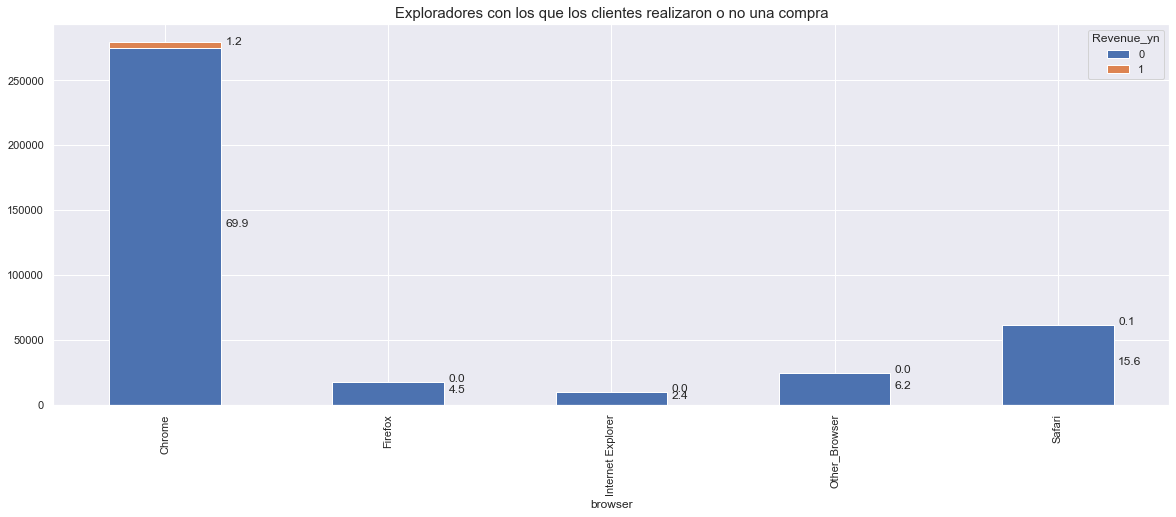

In [12]:
#Variable browser
pd.options.mode.chained_assignment = None
#Me quedo solo con los 4 buscadores mas usados
data['browser'][(data['browser'] != 'Chrome') & (data['browser'] != 'Safari') & (data['browser'] != 'Firefox') 
     & (data['browser'] != 'Internet Explorer')]= 'Other_Browser'


ax = data.groupby(['browser', 'Revenue_yn']).size().unstack(level = 1).plot(kind = 'bar', figsize = (20,7), stacked=True)

total = data.shape[0]

for p in ax.patches:
        percentage = "{:.1f}".format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.title('Exploradores con los que los clientes realizaron o no una compra', fontsize = 15)
plt.show()

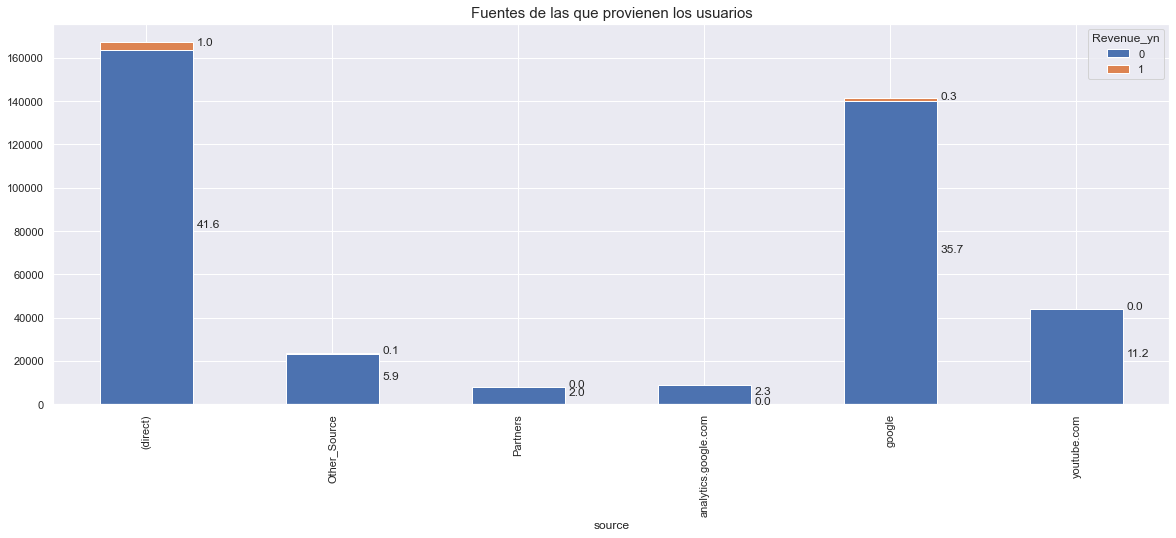

In [13]:
#Variable source
data.groupby(['source']).size().sort_values(ascending = False)[:8]
#Me quedo con las 5 fuentes principales 
data['source'][(data['source'] != '(direct)') & (data['source'] != 'google') & (data['source'] != 'youtube.com') 
     & (data['source'] != 'analytics.google.com') & (data['source'] != 'Partners')]= 'Other_Source'

ax = data.groupby(['source', 'Revenue_yn']).size().unstack(level = 1).plot(kind = 'bar', figsize = (20,7), stacked=True)

total = data.shape[0]

for p in ax.patches:
        percentage = "{:.1f}".format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.title('Fuentes de las que provienen los usuarios', fontsize = 15)
plt.show()

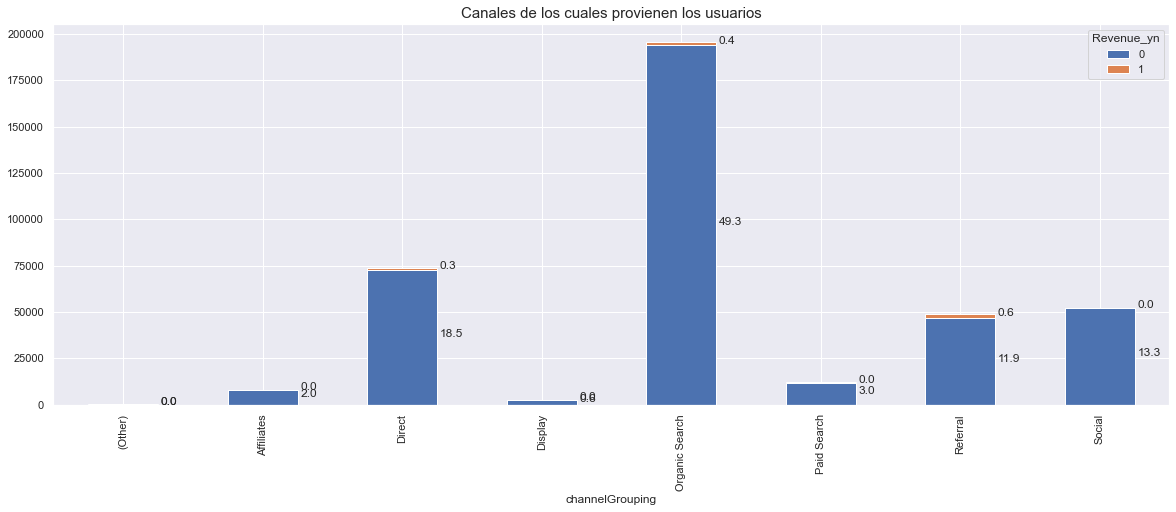

In [14]:
#Variable channelGrouping
ax = data.groupby(['channelGrouping', 'Revenue_yn']).size().unstack(level = 1).plot(kind = 'bar', figsize = (20,7), stacked=True)

total = data.shape[0]

for p in ax.patches:
        percentage = "{:.1f}".format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.title('Canales de los cuales provienen los usuarios', fontsize = 15)
plt.show()

Los 10 paises de usuarios mayoritarios que realizan compras country
United States    5042
Canada             80
Japan              11
Taiwan             11
Venezuela           9
Mexico              8
Australia           7
Singapore           6
Brazil              6
South Korea         5
Name: transactionRevenue, dtype: int64


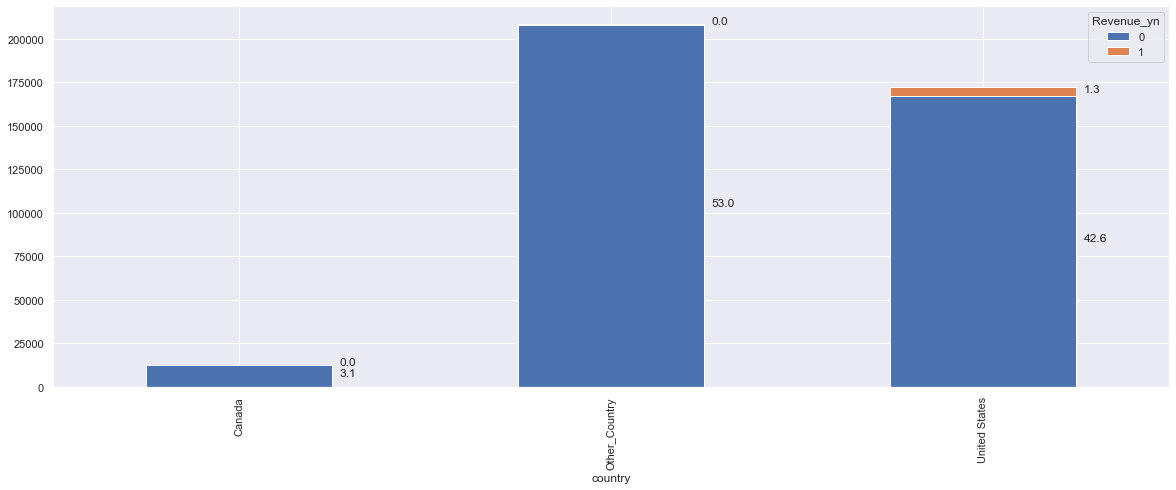

In [15]:
#Variable country
country_transactions = data[data['transactionRevenue'] > 0].groupby('country')['transactionRevenue'].count()
print('Los 10 paises de usuarios mayoritarios que realizan compras',country_transactions.sort_values(ascending = False)[:10])

#Me quedo con los 2 paises que mas ventas tienen
data['country'][(data['country'] != 'United States') & (data['country'] != 'Canada')]= 'Other_Country'

ax = data.groupby(['country','Revenue_yn']).size().unstack(level = 1).plot(kind = 'bar', figsize = (20,7), stacked=True)

total = data.shape[0]

for p in ax.patches:
        percentage = "{:.1f}".format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.title('', fontsize = 15)
plt.show()

In [16]:
city_transactions = data[(data['transactionRevenue'] > 0) & (data['country'] == 'United States')].groupby('city')['transactionRevenue'].count()
print('Las 10 ciudades donde mas compras se realizan',city_transactions.sort_values(ascending = False)[:15])

print('Porcentaje de datos faltantes de la variable ciudad:',data['city'][data['city'] == 'not available in demo dataset'].count()*100/data.shape[0])

Las 10 ciudades donde mas compras se realizan city
not available in demo dataset    2030
New York                          672
Mountain View                     524
San Francisco                     324
Sunnyvale                         209
Chicago                           199
Los Angeles                       144
Seattle                           120
San Jose                          111
Austin                             92
Ann Arbor                          76
Cambridge                          53
San Bruno                          51
Atlanta                            48
Kirkland                           45
Name: transactionRevenue, dtype: int64
Porcentaje de datos faltantes de la variable ciudad: 58.06481170397972


In [17]:
#Variable hits
mean_hits_buy = data[data['Revenue_yn'] == 1]['hits'].mean()
mean_hits_notbuy = data[data['Revenue_yn'] == 0]['hits'].mean()

print('En promedio los clientes que realizan alguna compra, realizaron', "{:.1f}".format(mean_hits_buy),' interacciones en la pagina')
print('En promedio los clientes que no realizan ninguna compra, realizaron', "{:.1f}".format(mean_hits_notbuy),' interacciones en la pagina')

En promedio los clientes que realizan alguna compra, realizaron 32.4  interacciones en la pagina
En promedio los clientes que no realizan ninguna compra, realizaron 4.0  interacciones en la pagina


In [18]:
#Country = pd.get_dummies(data['country'])
#data = data.join(Country)

Source = pd.get_dummies(data['source'])
data = data.join(Source)

#Group = pd.get_dummies(data['channelGrouping'])
#data = data.join(Group)

Device = pd.get_dummies(data['deviceCategory'])
data = data.join(Device)

Browser = pd.get_dummies(data['browser'])
data = data.join(Browser)

y = data['Revenue_yn']
X = data.drop(['fullVisitorID','Revenue_yn', 'bounces', 
               'transactionRevenue', 'transactions', 'date', 
               'city', 'source', 'channelGrouping', 'deviceCategory',
               'browser', 'country', 'city'], axis=1)

In [19]:
print(X.shape, y.shape)
X.head()

(392892, 18) (392892,)


,visitNumber,hits,pageviews,timeOnSite,(direct),Other_Source,Partners,analytics.google.com,google,youtube.com,desktop,mobile,tablet,Chrome,Firefox,Internet Explorer,Other_Browser,Safari
0,1,1,1.0,276.837127,1,0,0,0,0,0,1,0,0,1,0,0,0,0
1,2,1,1.0,276.837127,1,0,0,0,0,0,0,1,0,1,0,0,0,0
2,1,1,1.0,276.837127,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,2,1,1.0,276.837127,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,1,1,1.0,276.837127,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [20]:
#Verifico que no tengo valores nan
X.isna().sum()

visitNumber             0
hits                    0
pageviews               0
timeOnSite              0
(direct)                0
Other_Source            0
Partners                0
analytics.google.com    0
google                  0
youtube.com             0
desktop                 0
mobile                  0
tablet                  0
Chrome                  0
Firefox                 0
Internet Explorer       0
Other_Browser           0
Safari                  0
dtype: int64

In [3]:
#Realizo un sobre muestreo de los datos con el metodo SMOTE para equilibrar la clase a predecir. 
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', y.shape, X.shape)
print('Resample dataset shape', y_smote.shape, X_smote.shape)

print(y_smote[y_smote==1].count())
print(y_smote[y_smote==0].count())

NameError: name 'X' is not defined

In [17]:
#Divido los datos en el set de entrenamiento y el set de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.30, random_state = 42)

In [18]:
#Escalo los datos
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [19]:
#Modelo de Random Forest con Randomized Search para encontrar el mejor hiperparametro max_depth 
from sklearn.metrics import f1_score, recall_score, precision_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

rand_forest = RandomForestClassifier(random_state=42)
model_smote = RandomizedSearchCV(rand_forest,param_distributions={'max_depth': np.arange(2, 16)}, 
                           cv=5, refit=True, scoring = make_scorer(f1_score))

model_smote.fit(X_train, y_train.values.ravel())

print("Mejores parametros: "+str(model_smote.best_params_))
print("F1 Score: "+str(model_smote.best_score_)+'\n')

#Hago las predicciones con el modelo 
y_train_pred = model_smote.predict(X_train)
y_test_pred = model_smote.predict(X_test)

print('Recall score Train: ',metrics.recall_score(y_train, y_train_pred))
print('Recall score Test: ',metrics.recall_score(y_test, y_test_pred))
print('Precision score Train: ',metrics.precision_score(y_train, y_train_pred))
print('Precision score Test: ',metrics.precision_score(y_test, y_test_pred))

Mejores parametros: {'max_depth': 15}
F1 Score: 0.9819346472841616

Recall score Train:  0.9981305033997552
Recall score Test:  0.996856183269054
Precision score Train:  0.9687184625845471
Precision score Test:  0.9672131147540983


              precision    recall  f1-score   support

           0       1.00      0.97      0.98    116150
           1       0.97      1.00      0.98    116419

    accuracy                           0.98    232569
   macro avg       0.98      0.98      0.98    232569
weighted avg       0.98      0.98      0.98    232569



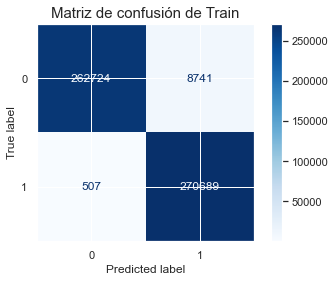

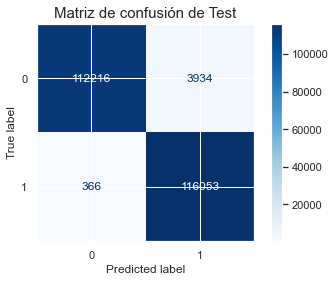

In [20]:
#Matriz de confusión 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_smote, X_train, y_train, cmap=plt.cm.Blues, values_format = '.0f')
plt.title('Matriz de confusión de Train', fontsize = 15)

plot_confusion_matrix(model_smote, X_test, y_test, cmap=plt.cm.Blues, values_format = '.0f')
plt.title('Matriz de confusión de Test',  fontsize = 15)

print(classification_report(y_test, y_test_pred))

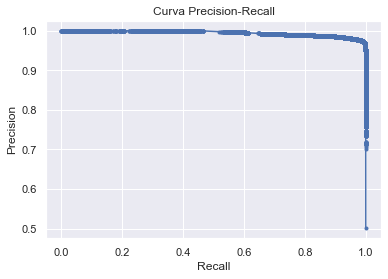

AUC: 0.995


In [21]:
from sklearn.metrics import precision_recall_curve
proba_smote = model_smote.predict_proba(X_test)
proba_smote1 = proba_smote[:, 1]
precision_smote, recall_smote, _ = precision_recall_curve(y_test, proba_smote1)

plt.plot(recall_smote, precision_smote, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.show()

auc_score_smote = metrics.auc(recall_smote, precision_smote)
print('AUC: %.3f' % auc_score_smote)

In [22]:
print('Variable Revenue_yn:\n', y_test[:5])
print('Probabilidad estimada por el modelo de la variable Revenue_yn, el primer valor corresponde a la probabilidad de que sea 0 y el segundo a la probabilidad de que sea 1:\n',proba_smote[:5])

#Como podemos ver, para el primer valor que es 0 (es decir que no compró), la probabilidad me da 1 para la clase 0.
#Para el segundo valor que es un 1, la predicción me da 0,99 de probabilidad para el valor 1, es decir un 99% de probabilidades de que compre. 
#Para el tercer valor, que es un 1, la probabilidad me da 0,787 para el valor 1, una probabilidad del 79% de que el usuario compre. 

Variable Revenue_yn:
 377388    0
440407    1
544354    1
155608    0
433225    1
Name: Revenue_yn, dtype: int64
Probabilidad estimada por el modelo de la variable Revenue_yn, el primer valor corresponde a la probabilidad de que sea 0 y el segundo a la probabilidad de que sea 1:
 [[1.         0.        ]
 [0.05573343 0.94426657]
 [0.0092395  0.9907605 ]
 [1.         0.        ]
 [0.03215773 0.96784227]]


In [23]:
#Ahora pruebo submuestreando los datos para equilibrar la clase 
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0, replacement=True)# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X, y)

print('Original dataset shape', y.shape, X.shape)
print('Resample dataset shape', y_rus.shape, X_rus.shape)

print(y_rus[y_rus==1].count())
print(y_rus[y_rus==0].count())

Original dataset shape (392892,) (392892, 18)
Resample dataset shape (10554,) (10554, 18)
5277
5277


In [24]:
#Divido los datos en set de entrenamiento y set de prueba
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size = 0.30, random_state = 42)
#Escalo los datos
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [25]:
rand_forest = RandomForestClassifier(random_state=42)
model_rus = RandomizedSearchCV(rand_forest,param_distributions={'max_depth': np.arange(2, 16)}, 
                           cv=5, refit=True, scoring = make_scorer(f1_score))

model_rus.fit(X_train, y_train.values.ravel())

print("Mejores parametros: "+str(model_rus.best_params_))
print("F1 Score: "+str(model_rus.best_score_)+'\n')

#Hago las predicciones con el modelo 
y_train_pred_rus = model_rus.predict(X_train)
y_test_pred_rus = model_rus.predict(X_test)

print('Recall score Train: ',metrics.recall_score(y_train, y_train_pred_rus))
print('Recall score Test: ',metrics.recall_score(y_test, y_test_pred_rus))
print('Precision score Train: ',metrics.precision_score(y_train, y_train_pred_rus))
print('Precision score Test: ',metrics.precision_score(y_test, y_test_pred_rus))

Mejores parametros: {'max_depth': 9}
F1 Score: 0.9554332029228592

Recall score Train:  0.9919093851132686
Recall score Test:  0.9872530274059911
Precision score Train:  0.9418693982074263
Precision score Test:  0.9269898264512269


              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1598
           1       0.93      0.99      0.96      1569

    accuracy                           0.96      3167
   macro avg       0.96      0.96      0.96      3167
weighted avg       0.96      0.96      0.96      3167



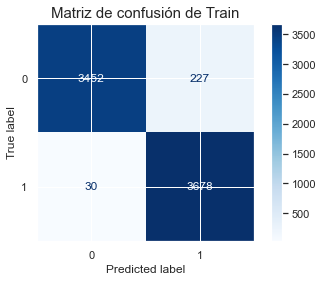

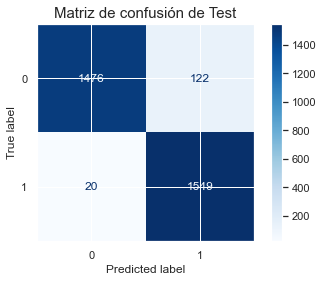

In [26]:
#Matriz de confusion
plot_confusion_matrix(model_rus, X_train, y_train, cmap=plt.cm.Blues, values_format = '.0f')
plt.title('Matriz de confusión de Train', fontsize = 15)

plot_confusion_matrix(model_rus, X_test, y_test, cmap=plt.cm.Blues, values_format = '.0f')
plt.title('Matriz de confusión de Test',  fontsize = 15)

print(classification_report(y_test, y_test_pred_rus))

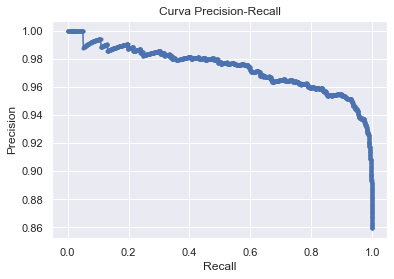

AUC: 0.973


In [27]:
from sklearn.metrics import precision_recall_curve
proba_rus = model_rus.predict_proba(X_test)
proba_rus1 = proba_rus[:, 1]
precision_rus, recall_rus, _ = precision_recall_curve(y_test, proba_rus1)

plt.plot(recall_rus, precision_rus, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.show()

auc_score_rus = metrics.auc(recall_rus, precision_rus)
print('AUC: %.3f' % auc_score_rus)

In [28]:
print('Variable Revenue_yn:\n', y_test[:5])
print('Probabilidad estimada por el modelo de la variable Revenue_yn, el primer valor corresponde a la probabilidad de que sea 0 y el segundo a la probabilidad de que sea 1:\n',proba_rus[:5])

#Para el primero caso que es un 0, la predicción da 0,988 para el 0 y 0,01 para el 1.
#Para el segundo caso que es un 1, la predicción da 0,06 para el 0 y 0,938 para el 1.
#Para el tercer caso que es un 1, la predicción da 0,02 para el 0 y 0,97 para el 1. 


Variable Revenue_yn:
 1950    0
8695    1
6395    1
1360    0
8066    1
Name: Revenue_yn, dtype: int64
Probabilidad estimada por el modelo de la variable Revenue_yn, el primer valor corresponde a la probabilidad de que sea 0 y el segundo a la probabilidad de que sea 1:
 [[0.98805953 0.01194047]
 [0.06116132 0.93883868]
 [0.02367758 0.97632242]
 [0.99778254 0.00221746]
 [0.05137368 0.94862632]]
